# 插件：fy_eq 二维平衡分析 

## 主要功能

- 二维平衡分析
- 磁面平均
- 磁坐标转换 (TODO)


## 创建 `equilibrium` 实例
指定调用插件 `fy_eq` 的 `equilibrium` 实例。

In [1]:
from fytok.modules.Equilibrium import Equilibrium

equilibrium = Equilibrium({"code": {"name": "fy_eq"}}, "file+geqdsk://./data/g070754.05000#equilibrium")

2023-11-30 10:08:42,512 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module fytok.plugins.equilibrium.fy_eq
2023-11-30 10:08:42,515 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module spdm.plugins.data.plugin_geqdsk


## 可视化 

### 2D 磁面

自动确定 磁轴 o-point，x-point，和最外层闭合磁面

2023-11-30 10:08:42,561 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module spdm.view.view_matplotlib
2023-11-30 10:08:42,597 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module spdm.mesh.mesh_rectangular


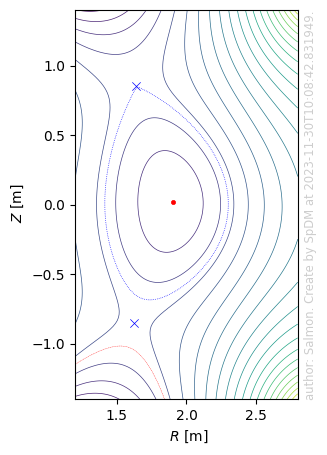

In [2]:
import spdm.view.View as sp_view

fig =sp_view.display(equilibrium)

### 1D 磁面坐标的函数

除了基础量 `ffprime`, `pprime`, 和二维 `psi`外，其他物理量都是通过计算得出的

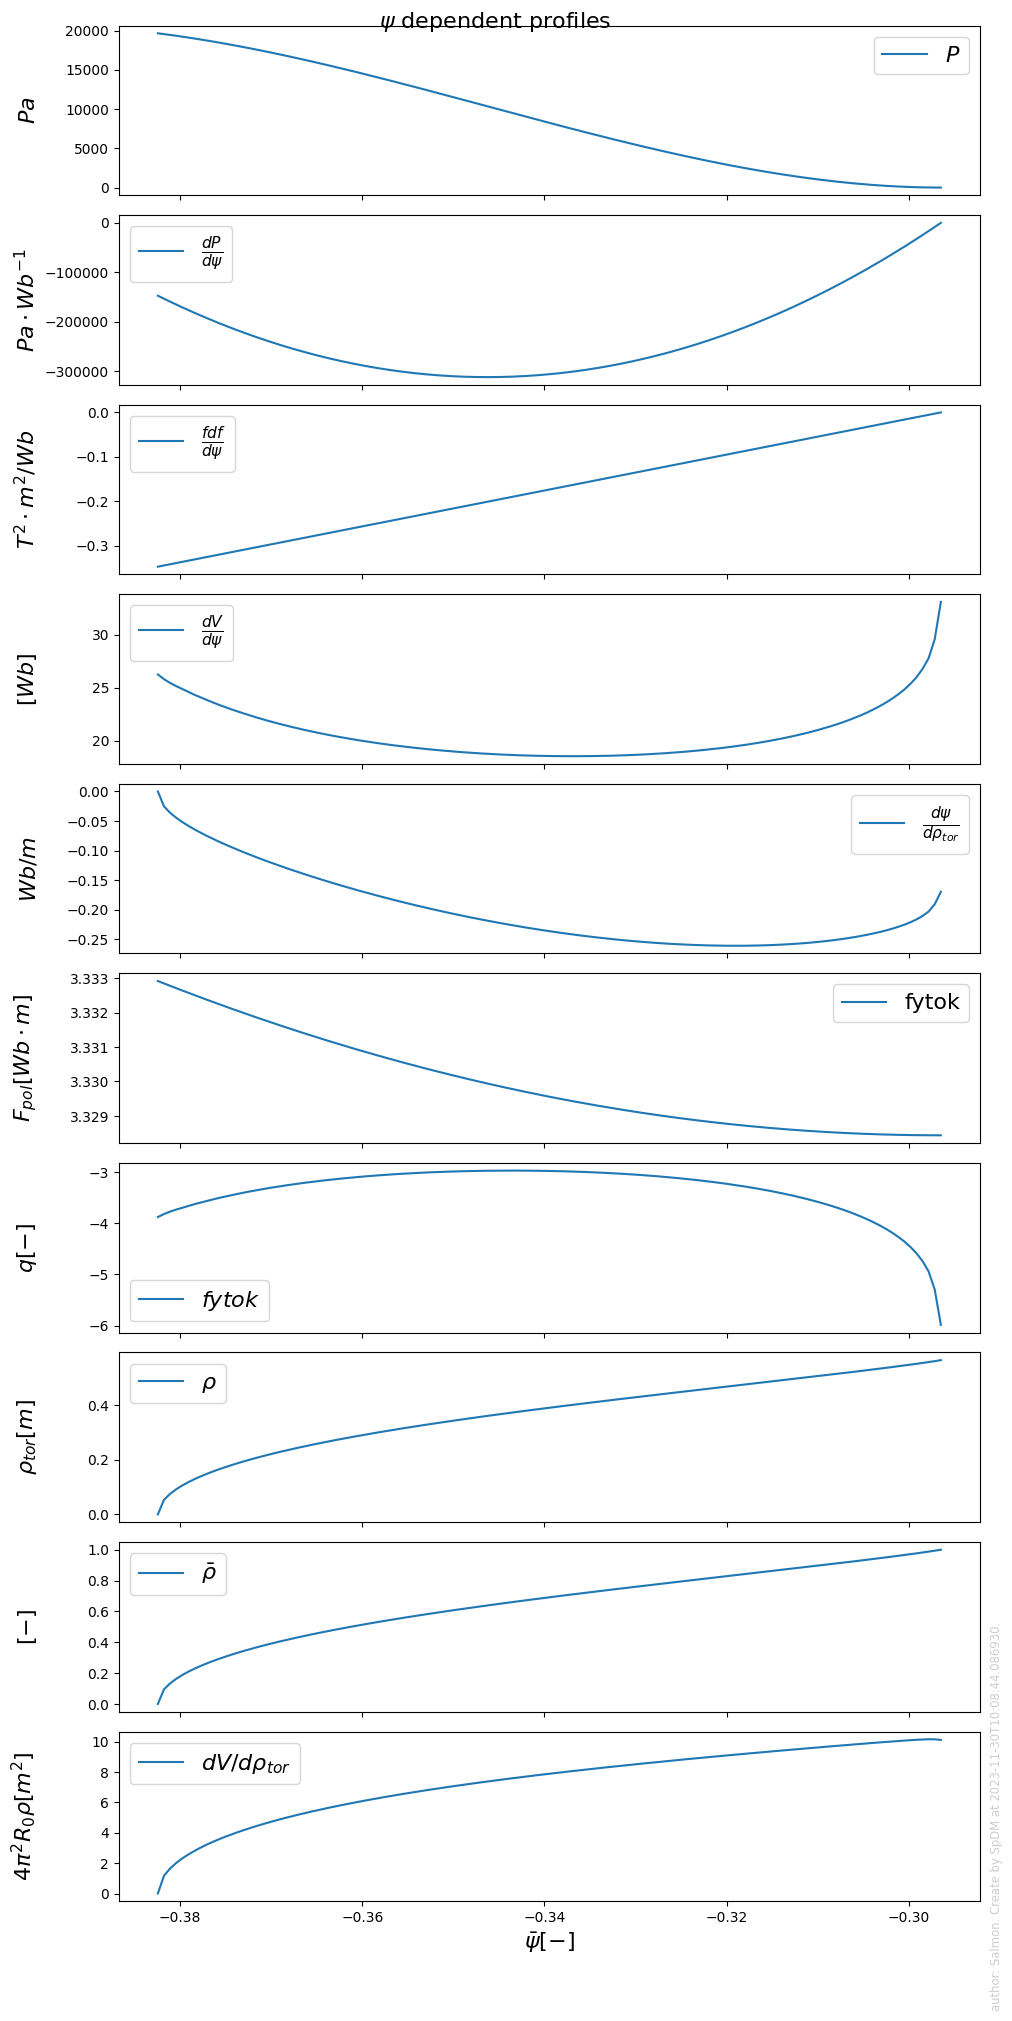

In [3]:
eq_profiles_1d = equilibrium.time_slice.current.profiles_1d

profs = sp_view.plot(
    [
        eq_profiles_1d.pressure,
        eq_profiles_1d.dpressure_dpsi,
        eq_profiles_1d.f_df_dpsi,
        ((eq_profiles_1d.dvolume_dpsi, {"label": r"$\frac{dV}{d\psi}$"}), {"y_label": r"$[Wb]$"}),
        (eq_profiles_1d.dpsi_drho_tor, {"label": r"$\frac{d\psi}{d\rho_{tor}}$"}),
        ((eq_profiles_1d.f, {"label": r"fytok"}), {"y_label": r"$F_{pol} [Wb\cdot m]$"}),
        ((eq_profiles_1d.q, {"label": r"$fytok$"}), {"y_label": r"$q [-]$"}),
        ((eq_profiles_1d.rho_tor, {"label": r"$\rho$"}), {"y_label": r"$\rho_{tor}[m]$"}),
        ((eq_profiles_1d.rho_tor_norm, {"label": r"$\bar{\rho}$"}), {"y_label": r"[-]"}),
        ((eq_profiles_1d.dvolume_drho_tor, {"label": r"$dV/d\rho_{tor}$"}), {"y_label": r"$4\pi ^ 2 R_0 \rho[m ^ 2]$"}),
    ],
    x_axis=equilibrium.time_slice.current.profiles_1d.psi,
    x_label=r"$\bar{\psi}[-]$",
    title=r"$\psi$ dependent profiles",
)

## 1D：磁面平均给出几何量

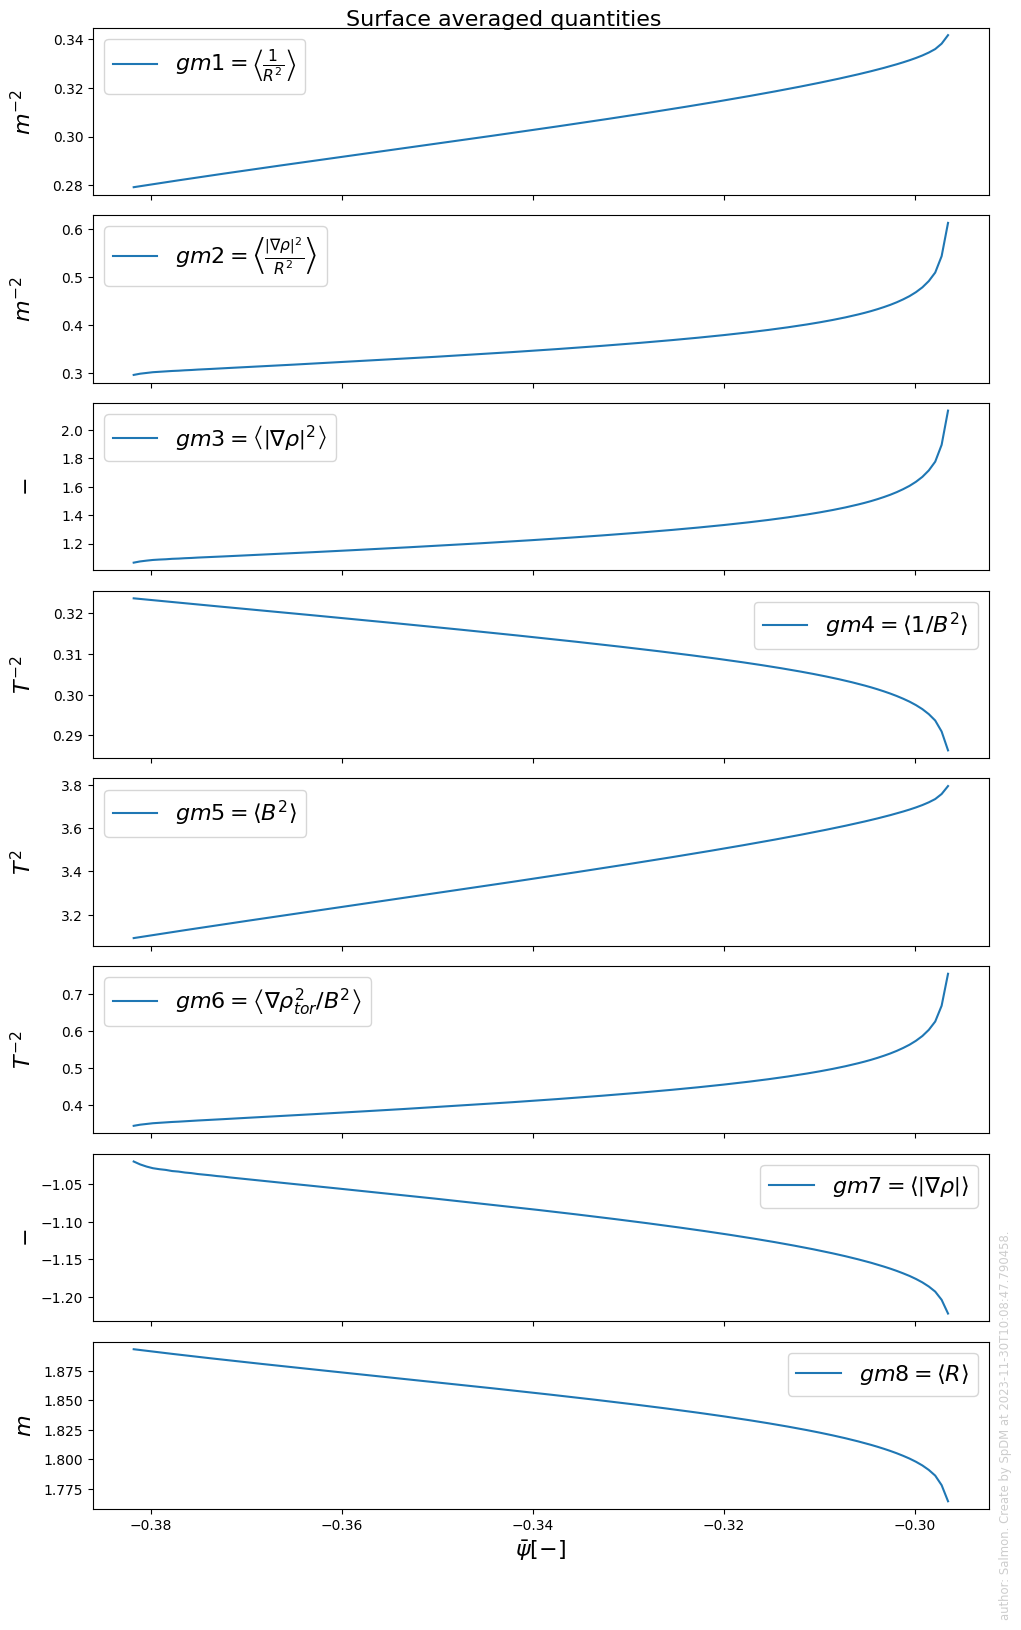

In [4]:
surfs = sp_view.plot(
    [
        (eq_profiles_1d.gm1, {"label": r"$gm1=\left<\frac{1}{R^2}\right>$"}),
        (eq_profiles_1d.gm2, {"label": r"$gm2=\left<\frac{\left|\nabla \rho\right|^2}{R^2}\right>$"}),
        (eq_profiles_1d.gm3, {"label": r"$gm3=\left<\left|\nabla \rho\right|^2\right>$"}),
        (eq_profiles_1d.gm4, {"label": r"$gm4=\left<1/B^2\right>$"}),
        (eq_profiles_1d.gm5, {"label": r"$gm5=\left<B^2\right>$"}),
        (eq_profiles_1d.gm6, {"label": r"$gm6=\left<\nabla \rho_{tor}^2/ B^2 \right>$"}),
        (eq_profiles_1d.gm7, {"label": r"$gm7=\left<\left|\nabla \rho\right|\right>$"}),
        (eq_profiles_1d.gm8, {"label": r"$gm8=\left<R\right>$"}),
    ],
    x_axis=equilibrium.time_slice.current.profiles_1d.psi.__array__()[1:],
    # x_value=tok.equilibrium.time_slice.current.profiles_1d.psi_norm[1:],
    x_label=r"$\bar{\psi}[-]$",
    title=r"Surface averaged quantities",
)